In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

In [48]:
df = pd.read_csv('Apple-Fitness-Data.csv')
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [49]:
df.shape

(149, 8)

In [50]:
df['Date'].unique()

array(['2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
       '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28',
       '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01'],
      dtype=object)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               149 non-null    object 
 1   Time                               149 non-null    object 
 2   Step Count                         149 non-null    int64  
 3   Distance                           149 non-null    float64
 4   Energy Burned                      149 non-null    float64
 5   Flights Climbed                    149 non-null    int64  
 6   Walking Double Support Percentage  149 non-null    float64
 7   Walking Speed                      149 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 9.4+ KB


In [52]:
df.describe()

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,224.959732,0.147963,14.497933,2.463087,0.298470,3.973772
std,277.919390,0.181177,9.607919,1.570520,0.022408,1.049368
min,1.000000,0.000460,0.171000,1.000000,0.261000,1.548000
25%,22.000000,0.014020,12.621000,1.000000,0.279000,3.312000
50%,89.000000,0.062900,14.422000,3.000000,0.295000,4.140000
75%,365.000000,0.219000,15.441000,3.000000,0.317000,4.896000
max,1082.000000,0.701180,60.514000,13.000000,0.354000,5.580000


In [53]:
#Checking for null values
df.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [54]:
fig = px.line(data_frame=df, x='Time', y='Step Count')
fig.show()

In [55]:
fig = px.line(data_frame=df, x='Time', y='Distance')
fig.show()

In [56]:
fig = px.line(data_frame=df, x='Time', y='Energy Burned')
fig.show()

In [57]:
fig = px.line(data_frame=df, x='Time', y='Walking Speed')
fig.show()

In [58]:
steps_per_day = df.groupby('Date')['Step Count'].sum().reset_index()
steps_per_day

,Date,Step Count
0,2023-03-21,1514
1,2023-03-22,10627
2,2023-03-23,873
3,2023-03-24,388
4,2023-03-25,1053
5,2023-03-26,1111
6,2023-03-27,391
7,2023-03-28,1965
8,2023-03-29,3222
9,2023-03-30,4226


In [59]:
fig = px.bar(steps_per_day,x='Date',y='Step Count')
fig.update_xaxes(type='category')
fig.show()

In [60]:
dis_per_day = df.groupby('Date')['Distance'].sum().reset_index()
dis_per_day

,Date,Distance
0,2023-03-21,0.94847
1,2023-03-22,6.90782
2,2023-03-23,0.60637
3,2023-03-24,0.25240
4,2023-03-25,0.72672
5,2023-03-26,0.75636
6,2023-03-27,0.26131
7,2023-03-28,1.23272
8,2023-03-29,2.20180
9,2023-03-30,2.77743


In [61]:
fig = px.bar(dis_per_day,x='Date',y='Distance')
fig.update_xaxes(type='category')
fig.show()

In [62]:
energy_per_day = df.groupby('Date')['Energy Burned'].sum().reset_index()
energy_per_day

,Date,Energy Burned
0,2023-03-21,161.934
1,2023-03-22,454.747
2,2023-03-23,114.424
3,2023-03-24,91.612
4,2023-03-25,135.542
5,2023-03-26,203.545
6,2023-03-27,189.253
7,2023-03-28,178.247
8,2023-03-29,253.911
9,2023-03-30,145.606


In [63]:
fig = px.bar(energy_per_day,x='Date',y='Energy Burned')
fig.update_xaxes(type='category')
fig.show()

In [68]:
df['time_intervals'] = pd.cut(pd.to_datetime(df["Time"]).dt.hour, bins=[0, 12, 18, 24], labels=["Morning", "Afternoon", "Evening"],right=False)

In [70]:
df['time_intervals'].unique()

['Afternoon', 'Evening', 'Morning']
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']

In [110]:
avg = df.groupby('time_intervals').mean().reset_index()
avg

,time_intervals,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,Morning,41.352941,0.027376,14.351118,2.294118,0.299059,4.544471
1,Afternoon,290.063492,0.191262,14.631524,2.428571,0.299556,3.737714
2,Evening,210.753623,0.138139,14.412130,2.536232,0.297333,4.048696


In [112]:
df['time_intervals'].unique()

['Afternoon', 'Evening', 'Morning']
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']

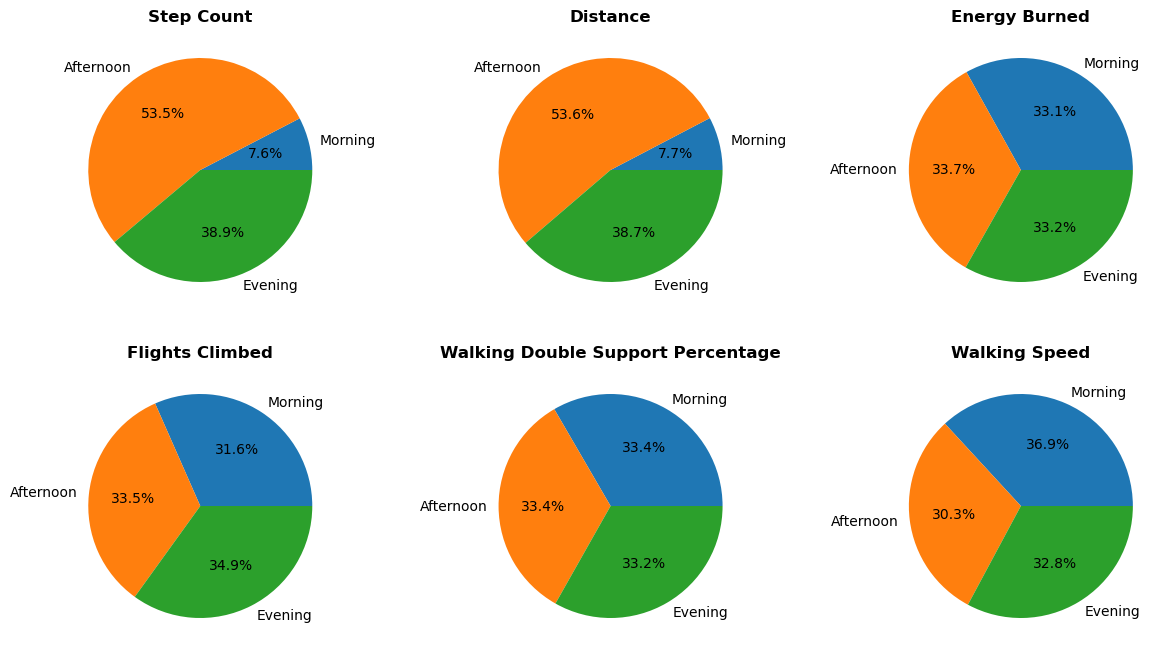

In [120]:
labels = ['Morning','Afternoon','Evening']
plt.figure(figsize=(15,8))
c = 1
for col in avg.iloc[:,1:]:
    plt.subplot(2,3,c)
    plt.pie(x=col,data=avg,labels = labels,autopct='%.1f%%')
    plt.title(col,weight='bold')
    c+=1

In [121]:
df

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,time_intervals
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060,Afternoon
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852,Afternoon
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996,Afternoon
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040,Afternoon
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184,Afternoon
...,...,...,...,...,...,...,...,...,...
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364,Afternoon
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400,Afternoon
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292,Afternoon
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860,Afternoon


In [123]:
pd.to_datetime(df['Time']).dt.hour

0      16
1      16
2      16
3      16
4      17
       ..
144    16
145    16
146    16
147    17
148    17
Name: Time, Length: 149, dtype: int64

In [129]:
hourly = df.groupby(pd.to_datetime(df['Time']).dt.hour).mean().reset_index()

In [130]:
hourly

,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,0,36.500000,0.021795,6.936000,2.500000,0.279000,4.842000
1,1,12.000000,0.007510,7.122667,2.666667,0.299667,3.984000
2,7,24.000000,0.016700,15.380000,3.000000,0.273000,5.148000
3,8,49.000000,0.032977,26.392000,2.666667,0.279000,4.404000
4,9,13.500000,0.007895,23.662000,2.000000,0.320500,4.176000
5,10,84.333333,0.058190,8.630333,1.666667,0.316000,4.920000
6,11,47.666667,0.031097,13.652667,2.000000,0.309333,4.716000
7,12,143.500000,0.100420,7.332500,3.000000,0.284500,3.204000
8,13,264.363636,0.180934,12.945000,2.090909,0.298091,2.863636
9,14,226.333333,0.148600,17.989556,2.555556,0.306778,4.004000


In [143]:
for col in hourly.iloc[:,1:]:
    fig = px.bar(data_frame=hourly,x='Time',y=col)
    fig.update_xaxes(type='category')
    fig.show()

In [149]:
fig = px.scatter(df, x="Step Count", y="Walking Speed", color="time_intervals", title="Step Count and Walking Speed Variations by Time Interval", trendline='ols')
fig.show()